In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import time
import pandas as pd

In [ ]:
x_train = "/content/drive/MyDrive/train-images.idx3-ubyte"
y_train = "/content/drive/MyDrive/train-labels.idx1-ubyte"
x_test = "/content/drive/MyDrive/t10k-images.idx3-ubyte"
y_test = "/content/drive/MyDrive/t10k-labels.idx1-ubyte"

In [ ]:
def create_csv(img,labels,outf,n):
  imgf = open(img,"rb")
  lblf = open(labels, "rb")
  csvf = open(outf, "w")

  imgf.read(16)
  lblf.read(8)
  images = []

  for i in range(n):
        image = [ord(lblf.read(1))]
        for j in range(784):
            image.append(ord(imgf.read(1)))
        images.append(image)

  for image in images:
      csvf.write(",".join(str(i) for i in image)+"\n")
  imgf.close()
  lblf.close()
  csvf.close()

In [ ]:
create_csv(x_train, y_train, "/content/train.csv",60000)
create_csv(x_test,y_test, "/content/test.csv",10000)

In [ ]:
data = pd.read_csv('/content/train.csv')
data_test = pd.read_csv("/content/test.csv")


In [ ]:
data = np.array(data)
data_test = np.array(data_test)
m_t, n_t = data_test.shape
m, n = data.shape
np.random.shuffle(data)

In [ ]:
data_test = data_test.T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
def parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2



In [ ]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def d_relu(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * d_relu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.2, 500)

Iteration:  0
[4 4 4 ... 3 4 4] [6 0 5 ... 9 8 5]
0.08416806946782446
Iteration:  10
[4 3 9 ... 6 3 2] [6 0 5 ... 9 8 5]
0.23015383589726496
Iteration:  20
[4 6 7 ... 6 3 2] [6 0 5 ... 9 8 5]
0.3265054417573626
Iteration:  30
[4 6 7 ... 6 3 2] [6 0 5 ... 9 8 5]
0.38007300121668697
Iteration:  40
[6 6 7 ... 6 3 2] [6 0 5 ... 9 8 5]
0.5013583559725996
Iteration:  50
[6 6 1 ... 6 3 2] [6 0 5 ... 9 8 5]
0.5678261304355072
Iteration:  60
[6 6 1 ... 9 3 2] [6 0 5 ... 9 8 5]
0.6128935482258038
Iteration:  70
[6 6 1 ... 9 3 2] [6 0 5 ... 9 8 5]
0.6471607860131002
Iteration:  80
[6 6 1 ... 9 3 3] [6 0 5 ... 9 8 5]
0.6750779179652994
Iteration:  90
[6 6 1 ... 9 3 3] [6 0 5 ... 9 8 5]
0.6988783146385773
Iteration:  100
[6 6 1 ... 9 3 5] [6 0 5 ... 9 8 5]
0.7204786746445774
Iteration:  110
[6 6 1 ... 9 3 5] [6 0 5 ... 9 8 5]
0.738595643260721
Iteration:  120
[6 6 1 ... 9 3 5] [6 0 5 ... 9 8 5]
0.7544125735428924
Iteration:  130
[6 6 1 ... 9 3 5] [6 0 5 ... 9 8 5]
0.7685128085468091
Iteration:  140

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


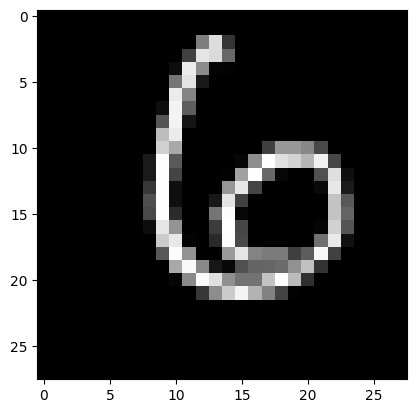

In [ ]:
# test_prediction(0, W1, b1, W2, b2)
# test_prediction(1, W1, b1, W2, b2)
# test_prediction(2, W1, b1, W2, b2)
test_prediction(99, W1, b1, W2, b2) #index can vary from 0 to 9998

In [ ]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test) #accuracy of the test set

[2 1 0 ... 4 5 6] [2 1 0 ... 4 5 6]


0.8780878087808781